Linear Regression to predict insurance charges based on user inputs.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
insurance = pd.read_csv('insurance.csv')
print(insurance.shape)
insurance.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Features age, sex, bmi, children, smoker, region
#### Target - charges
#### Categorical Features - sex, smoker, region

In [5]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data analysis

In [6]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


c:\Users\devas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


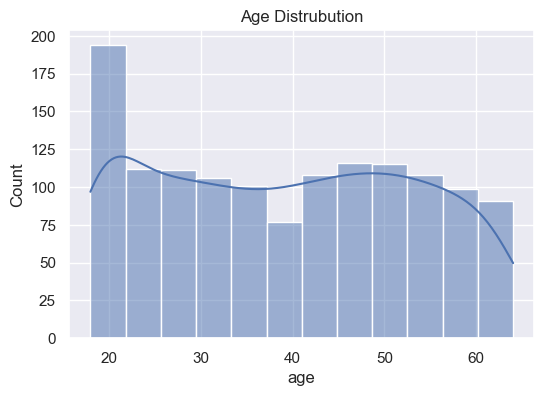

In [7]:
# 1. distribution of age value
sns.set()
plt.figure(figsize=(6,4))
sns.histplot(insurance['age'], kde=True)
plt.title('Age Distrubution')
plt.show()

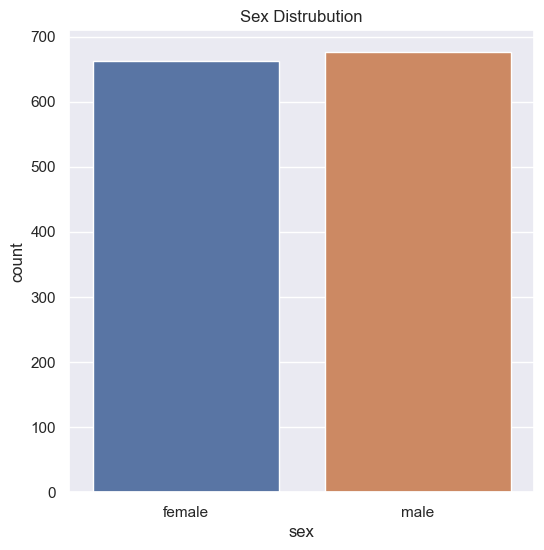

sex
male      676
female    662
Name: count, dtype: int64

In [8]:
# 2. gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance)
plt.title('Sex Distrubution')
plt.show()

insurance['sex'].value_counts()

c:\Users\devas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


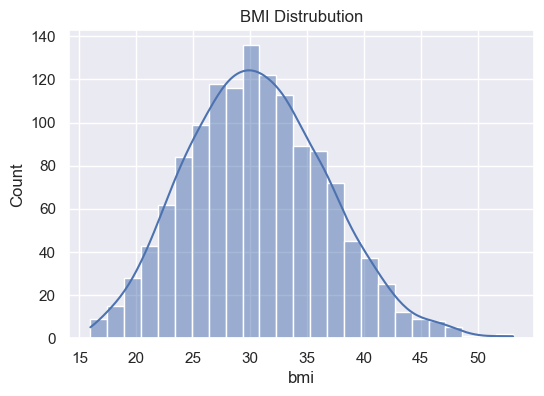

In [9]:
# 3. bmi distribution
plt.figure(figsize=(6,4))
sns.histplot(insurance['bmi'], kde=True)
plt.title('BMI Distrubution')
plt.show()

# Normal BMI Range --> 18.5 to 24.9

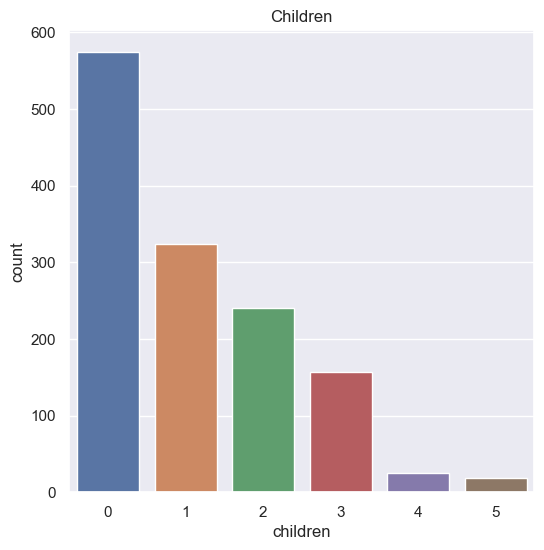

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [10]:
# 4. childern column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance)
plt.title('Children')
plt.show()
insurance['children'].value_counts()

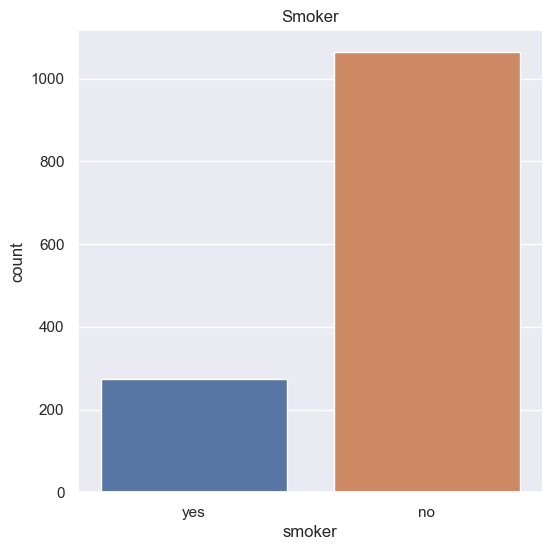

smoker
no     1064
yes     274
Name: count, dtype: int64

In [11]:
# 5. smoker column

plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance)
plt.title('Smoker')
plt.show()
insurance['smoker'].value_counts()

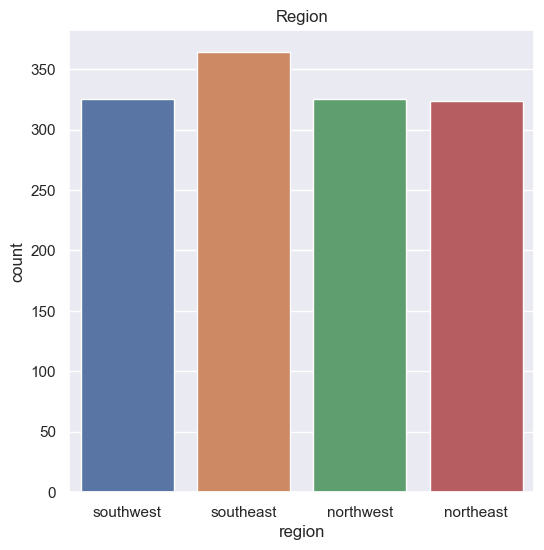

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [12]:
# 6. region column

plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance)
plt.title('Region')
plt.show()

insurance['region'].value_counts()

c:\Users\devas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


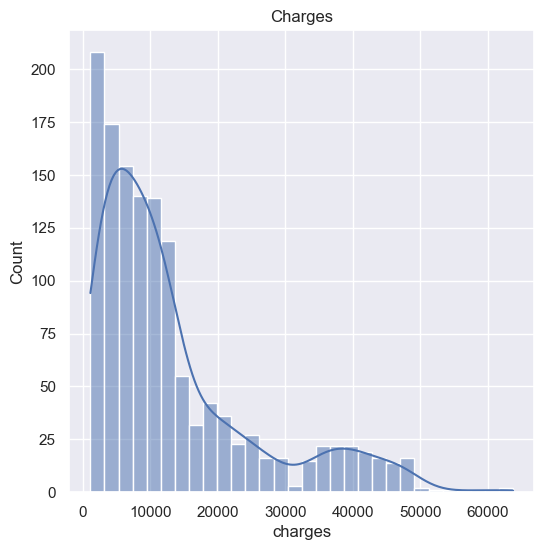

In [13]:
# 7. charges column
plt.figure(figsize=(6,6))
sns.histplot(insurance['charges'], kde=True)
plt.title('Charges')
plt.show()

## Data Pre-Processing
#### Encoding - Giving numerical values to categorical data

In [14]:
# Encoding sex column
insurance.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# Encoding smoker column
insurance.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

# Encoding region column
insurance.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [16]:
insurance.head()
# Six columns will act as features and charges will be target

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


### Splitting the Features and Target

In [17]:
X = insurance.drop(columns='charges', axis=1)
Y = insurance['charges']

In [18]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3


In [19]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### Splitting the data into Training and Testing data

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [38]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(1338, 6) (1070, 6) (268, 6)
(1338,) (1070,) (268,)


## Model Training
#### Linear Regression

In [39]:
# Loading the Linear Regression model
regressor = LinearRegression()

In [40]:
regressor.fit(X_train, Y_train)

LinearRegression()

### Model Evaluation

In [42]:
# predicton on training data
training_data_prediction = regressor.predict(X_train)

In [43]:
# R squared value -- gives value between 0 to 1
# checking orginal values with values predicted by model
r2_train = metrics.r2_score(Y_train, training_data_prediction)
r2_train

0.751505643411174

In [44]:
# predicton on testing data
testing_data_prediction = regressor.predict(X_test)

In [45]:
r2_test = metrics.r2_score(Y_test, testing_data_prediction)
r2_test

0.7447273869684077

## Building a Predictive System

In [46]:
def predictFunction(data):
    # changing input tuple to np array
    input_arr = np.array(data)

    # reshape the array
    input_arr_reshape = input_arr.reshape(1, -1)
    
    prediction = regressor.predict(input_arr_reshape)
    return prediction[0]

In [49]:
# sex : {'male':0, 'female':1}

# smoker : {'yes':0, 'no':1}

# region : {'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}

# Columns -> age, sex, bmi, children, smoker, region


print('The Changres will be : ', predictFunction((31, 1, 25.74, 0, 1, 0)))
print('The Changres will be : ', predictFunction((27, 0, 42.13, 0, 0, 0)))
print('The Changres will be : ', predictFunction((63, 0, 28.31, 0, 1, 3)))

The Changres will be :  3760.0805764960514
The Changres will be :  32075.738669618928
The Changres will be :  13265.35577631148


c:\Users\devas\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\devas\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\devas\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
